In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Load

In [3]:
df = pd.read_csv(r'C:\Users\sures\Documents\Python Training\Test files\fraud-detection.csv')

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100165 entries, 0 to 100164
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100165 non-null  int64  
 1   type            100165 non-null  object 
 2   amount          100165 non-null  float64
 3   nameOrig        100165 non-null  object 
 4   oldbalanceOrg   100165 non-null  float64
 5   newbalanceOrig  100165 non-null  float64
 6   nameDest        100165 non-null  object 
 7   oldbalanceDest  100165 non-null  float64
 8   newbalanceDest  100165 non-null  float64
 9   isFraud         100165 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 7.6+ MB


### Types of Transactions

<AxesSubplot:xlabel='type', ylabel='count'>

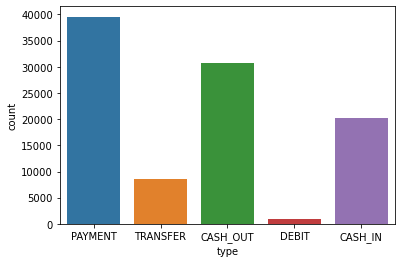

In [6]:
sns.countplot(x='type',data=df)

### Fraud Transactions

<AxesSubplot:xlabel='isFraud', ylabel='amount'>

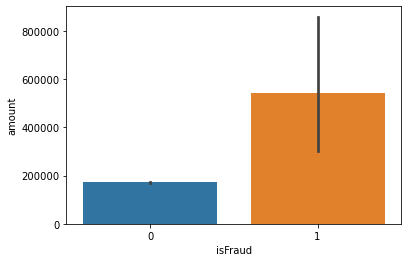

In [7]:
sns.barplot(x='isFraud', y ='amount', data = df)

In [8]:
fraud_case = df[df.isFraud == 1]
legit_case = df[df.isFraud == 0]
fraud_percentage = round(len(fraud_case)/len(legit_case)*100, 2)
print ('Total Fraud case = ',len(fraud_case))
print ('% of Fraud transactions = ',fraud_percentage)

Total Fraud case =  116
% of Fraud transactions =  0.12


In [9]:
print(('FRAUD CASE AMOUNT STATS'))
print(fraud_case.amount.describe())

FRAUD CASE AMOUNT STATS
count    1.160000e+02
mean     5.415784e+05
std      1.535067e+06
min      1.640000e+02
25%      1.724600e+04
50%      3.907782e+04
75%      2.961546e+05
max      1.000000e+07
Name: amount, dtype: float64


### Maximum frequency of amount at which Fraud occured

Text(0, 0.5, 'isFraud')

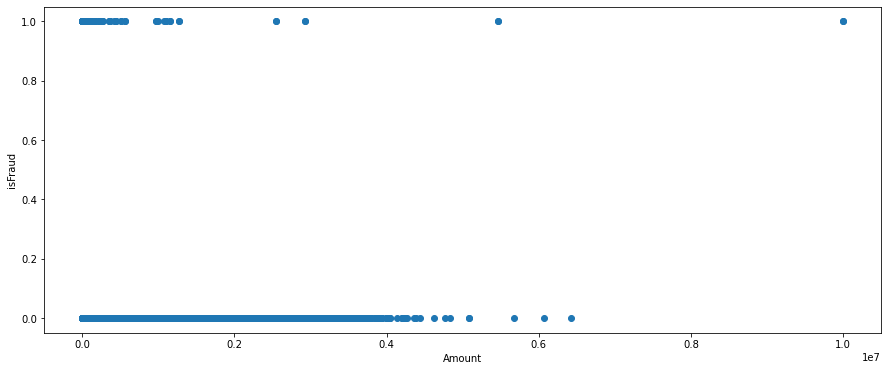

In [10]:
plt.figure(figsize=(15,6))
plt.scatter(x='amount',y='isFraud',data=df)
plt.xlabel('Amount')
plt.ylabel('isFraud')

### What type contribues to Fraud Transaction

<AxesSubplot:xlabel='type', ylabel='isFraud'>

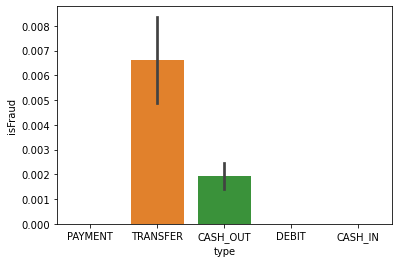

In [11]:
sns.barplot(x='type', y ='isFraud', data = df)

### At what hours the maximum fraud transactions are made

<AxesSubplot:xlabel='step', ylabel='isFraud'>

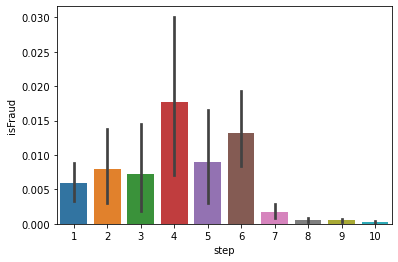

In [12]:
sns.barplot(x='step', y ='isFraud', data = df)

In [13]:
df_impact = df.loc[df['isFraud']==1,['nameOrig','oldbalanceOrg','newbalanceOrig']]

In [14]:
df_difference = df_impact['oldbalanceOrg']-df_impact['newbalanceOrig']

In [15]:
df_difference

2           181.00
3           181.00
251        2806.00
252        2806.00
680       20128.00
           ...    
77745         0.00
90070     93810.76
90071     93810.76
99371    503405.88
99372    503405.88
Length: 116, dtype: float64

In [16]:
df['impact']=df['oldbalanceOrg']-df['newbalanceOrig']

In [17]:
df =df.sort_values(by=['impact','oldbalanceOrg'],ascending=False)
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,impact
4441,4,CASH_OUT,10000000.00,C351297720,10000000.00,0.00,C766681183,0.00,9941904.21,1,10000000.00
4440,4,TRANSFER,10000000.00,C7162498,12900000.00,2930418.44,C945327594,0.00,0.00,1,9969581.56
10395,7,TRANSFER,5460002.91,C666654362,5460002.91,0.00,C1726301214,0.00,0.00,1,5460002.91
10396,7,CASH_OUT,5460002.91,C1588880909,5460002.91,0.00,C1570256460,0.00,9281535.44,1,5460002.91
4442,4,TRANSFER,2930418.44,C2047521920,2930418.44,0.00,C449261773,0.00,0.00,1,2930418.44
...,...,...,...,...,...,...,...,...,...,...,...
79596,10,CASH_IN,1041451.65,C1919054657,2181619.46,3223071.11,C1149080047,1146559.44,105107.80,0,-1041451.65
52155,9,CASH_IN,1053311.47,C272051553,2745833.08,3799144.55,C44870833,16600000.00,22500000.00,0,-1053311.47
54950,9,CASH_IN,1080135.03,C1530816695,2054669.28,3134804.31,C1688071442,1874282.45,1384157.89,0,-1080135.03
100136,10,CASH_IN,1208997.31,C605289001,5635363.49,6844360.80,C2029406675,2865703.34,1682910.52,0,-1208997.31


### Total Customers who gained from Fraud

In [18]:
print(len(df[df.impact > 0]))

48911


### Total Customers who incurred loss from fraud

In [19]:
print(len(df[df.impact < 0]))

19861


### Text to Numerical

In [20]:
df['type'] = df['type'].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})

### Split Test data and Train data

In [23]:
from sklearn.model_selection import train_test_split
X = np.array(df[['step','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']])
y = np.array(df[["isFraud"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [26]:
NB = GaussianNB()
NB.fit(X_train, y_train)

C:\Users\sures\anaconda3\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [28]:
y_pred = NB.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acc_score = accuracy_score(y_test, y_pred)
print(acc_score)

0.9809314630859083


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     20011
           1       0.01      0.09      0.01        22

    accuracy                           0.98     20033
   macro avg       0.50      0.54      0.50     20033
weighted avg       1.00      0.98      0.99     20033



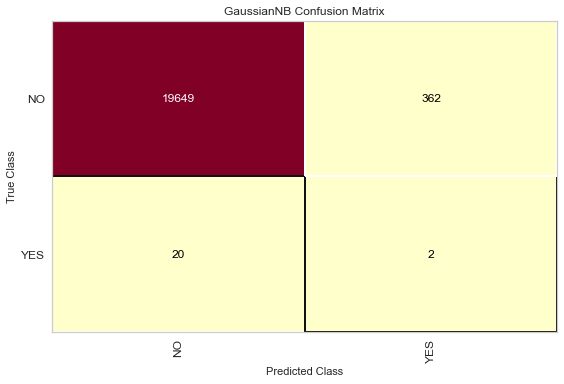

<AxesSubplot:title={'center':'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [32]:
# !pip install yellowbrick
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(NB, classes=['NO','YES'])
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()

### KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

C:\Users\sures\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9990016472819847

C:\Users\sures\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\sures\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\sures\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\sures\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

([<matplotlib.axis.XTick at 0x11bb6bf9b80>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

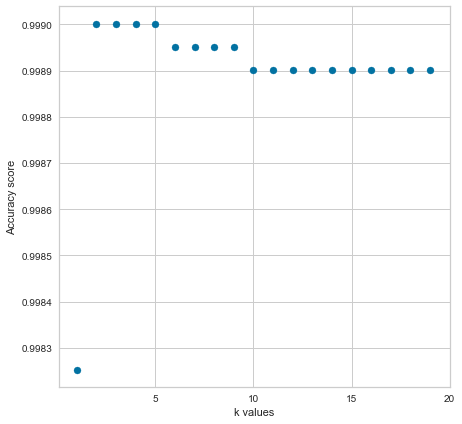

In [35]:
k_range = range(1, 20)
score = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score.append(knn.score(X_test, y_test))
    
plt.figure(figsize = (7, 7))
plt.xlabel('k values')
plt.ylabel('Accuracy score')
plt.scatter(k_range, score)
plt.xticks([5, 10, 15, 20])

In [36]:
yhat = knn.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [37]:
from sklearn import metrics

print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9988269355563321
Test set Accuracy:  0.9989018120101832


In [38]:
metrics.confusion_matrix(y_train, knn.predict(X_train))

array([[80038,     0],
       [   94,     0]], dtype=int64)

In [39]:
metrics.confusion_matrix(y_test, yhat)

array([[20011,     0],
       [   22,     0]], dtype=int64)